In [85]:
from ewatercycle_leakybucket.model import LeakyBucket
from ewatercycle.base.forcing import GenericLumpedForcing
import ewatercycle.observation.grdc
import ewatercycle.analysis
import ewatercycle.models
from pathlib import Path
from cartopy.io import shapereader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ewatercycle.container import ContainerImage

#shapefile that describes the basin we want to study.
shapeFile = "/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/AralSea_Basin/AralSeaBasin.shp"

#GRDC station ID for the observation station
grdc_station_id = "2617110"  # GRDC station ID
basin_name = "AMU DARYA"

#period of interest. Make sure that ERA5 is available on your machine for this period.
experiment_start_time="1990-01-01T00:00:00Z"
experiment_end_time="1990-12-31T00:00:00Z"

In [86]:
forcing = GenericLumpedForcing.generate(
    dataset='ERA5',
    start_time=experiment_start_time,
    end_time=experiment_end_time,
    shape=shapeFile
)

In [87]:

my_image = ContainerImage("/home/avandervee3/leakybucket_andre.sif")

model = LeakyBucket(forcing=forcing,
                    bmi_image=my_image)
cfg_file, _ = model.setup(leakiness=0.10)



In [88]:
model.initialize(cfg_file)

In [90]:


import xarray as xr

discharges = []
storages = []
n=0;
while model.time < model.end_time:
    discharges.append(model.get_value_as_xarray("discharge"))
    storages.append(model.get_value_as_xarray("storage"))
    model.update()
    if n % 100 == 0:
        model.set_value("storage", np.array([30], dtype=np.float32))  # reset storage to 30 mm every 100 time steps
    n+=1





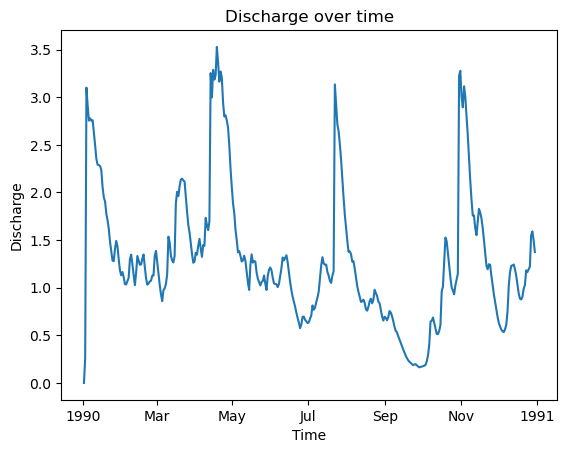

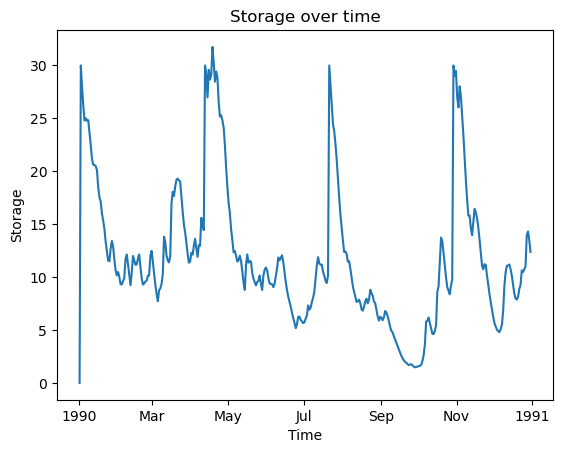

In [92]:
# Combine the time series
discharge = xr.concat(discharges, dim="time")
storages = xr.concat(storages, dim="time")

# Plot discharge on its own figure
plt.figure()            # creates a new figure
discharge.plot()
plt.title("Discharge over time")
plt.xlabel("Time")
plt.ylabel("Discharge")  # or your units
plt.show()

# Plot storage on its own figure
plt.figure()            # creates another new figure
storages.plot()
plt.title("Storage over time")
plt.xlabel("Time")
plt.ylabel("Storage")  # or your units
plt.show()

In [ ]:
discharge


In [ ]:
df = discharge.to_dataframe(name="discharge").reset_index()

# df heeft nu kolommen: time, x, y, discharge (afhankelijk van je dimensies)
print(df.head())

In [ ]:
from grpc4bmi.bmi_client_singularity import BmiClientSingularity

model = BmiClientSingularity('/home/avandervee3/leakybucket_henk.sif', work_dir='/tmp')
print(model.get_component_name())
del model

In [ ]:

my_image_henk = ContainerImage("/home/avandervee3/leakybucket_henk.sif")

model_henk = LeakyBucket(forcing=forcing,
                    bmi_image=my_image_henk)
cfg_file_henk, _ = model_henk.setup(leakiness=0.10)

In [ ]:
model_henk.initialize(cfg_file_henk)

In [ ]:


import xarray as xr

discharges_henk = []
while model_henk.time < model_henk.end_time:
    discharges_henk.append(model_henk.get_value_as_xarray("discharge"))
    model_henk.update()

discharges_henk = xr.concat(discharges_henk, dim="time")
discharges_henk.plot()



In [ ]:
print(model_henk.bmi.get_component_name())

In [ ]:
dir(model_henk)

In [ ]:
print(ewatercycle.models.sources)

In [ ]:
from ewatercycle.models import PCRGlobWB


In [ ]:
# parameter_set = ewatercycle.parameter_sets.ParameterSet(
#     name="custom_parameter_set",
#     directory=pcr_glob_directory,
#     config= Path.cwd() / "pcrglobwb_aral_basin_ERA5_05min.ini",
#     target_model="pcrglobwb",
#     supported_model_versions={"setters"},
# )


In [ ]:
# PCRGlobWB().bmi_image.apptainer_filename